In [1]:
import cv2
from cv2 import *
import numpy as np

from matplotlib import pyplot as plt

# to display images, for debugging purposes
from IPython.display import Image

# PIL (this uses a fork called PILLOW) is not used
from PIL import Image as im

Now that modules have been imported, load the test image

In [2]:
# test_image = (
#     "test_image.png"
# )

test_image = "not_scanned_small.png"

# loading image
image = cv2.imread(test_image)

initial_image = image
# display image
Image(url=test_image, width=300)

# image is of type
# print(f"Image is of type: {image.getType()}")

Creating an object of class QRCodeDetector and calling detectAndDecode on the object 

In [3]:
QRCodeDetector = cv2.QRCodeDetector()

decodedText, points, _ = QRCodeDetector.detectAndDecode(image)


# printing decodedText
print(f"Decoded Text:\n {decodedText}")

# print points
print(f"Points:\n {points}")

print("cell ran to completion")

Decoded Text:
 Other Test Data
Points:
 [[[147.      260.     ]
  [346.98508 260.     ]
  [350.      462.     ]
  [147.      462.     ]]]
cell ran to completion


Other Test Data


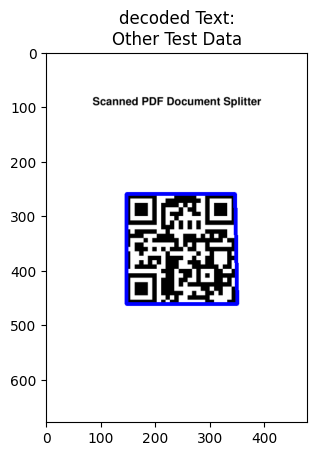

In [19]:
# check to see if a qr code has been detected
if points is not None:
    # Qr code detected
    nfOfPoints = len(points[0])
    # converting image, a ndarray to an image

    for i in range(nfOfPoints):
        nextPointIndex = i + 1  #% nfOfPoints
        if i == nfOfPoints - 1:
            # for the last line it goes from point[3] to point[0]
            cv2.line(
                image,
                points[0][i].astype(int),
                points[0][0].astype(int),
                (255, 0, 0),
                5,
            )
        else:
            cv2.line(
                image,
                points[0][i].astype(int),
                points[0][nextPointIndex].astype(int),
                (255, 0, 0),
                5,
            )

    # now going to output image
    # need to convert from BGR to RGB

    print(decodedText)
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title(f"decoded Text:\n{decodedText}")
else:
    print("QR code not found")